In [1]:
# import das bibliotecas necessarias:
import sys
import numpy as np
import matplotlib.pyplot as plt
import random

# bibliotecas para pintar prismas!
from matplotlib.path import Path
from matplotlib.patches import PathPatch

In [2]:
# path referente aa localizacao do modulo:
sys.path.append('/home/rodbijani/Documents/UFF/graduacao/IC/BrunoLima/IC-UFF/modules') # pc do Bijani
#sys.path.append('C:/Users/bruno/Documents/Projeto - Bijani/GitHub/IC-UFF/modules') # pc do Bruno

In [3]:
# Import da biblioteca externa:
from plots import plots_rectangles
from plots import plots_paint_rectangles

# Tarefa : 
> Plotar prismas de acordo com os dados fornecidos que são o número de observações e as dimensões referentes aos prismas. Neste caso, estamos considerando prismas de mesmas dimensões. Posteriormente, iremos diferenciar os prismas entre si. (OK)

In [4]:
# Coletando os limites em x e z do levantamento sintético:
nobs = 11 # número de observações
zmin = 0.0 # limite mínimo em z do levantamento sintético
zmax = 10.0 # limite máximo em z do levantamento sintético
xmin = 0.0 # limite mínimo em x do levantamento sintético
xmax = 100.0 # limite máximo em x do levantamento sintético

In [5]:
# definindo as coordenadas sinteticas do levantamento:
x = np.linspace(xmin, xmax, nobs, endpoint=True)
# é possível gerar valores para z de três formas distintas com as 4 linhas abaixo
z = np.linspace(0, 0, nobs, endpoint=True)
#z = np.zeros( len(x) )
#for i in range( len(x) ):
#    z[i] = random.uniform(0.0, -10.0)

print(x[1]-x[0])

10.0


In [6]:
# cálculo do valor que deve ser somado ou subtraido aos pontos de observação para se ter as coordenadas x dos retângulos:
xmed = ( x[0] + x[1] ) / 2.0
x_prisma = abs( x[0] - ( xmed ) )

print (x_prisma)

5.0


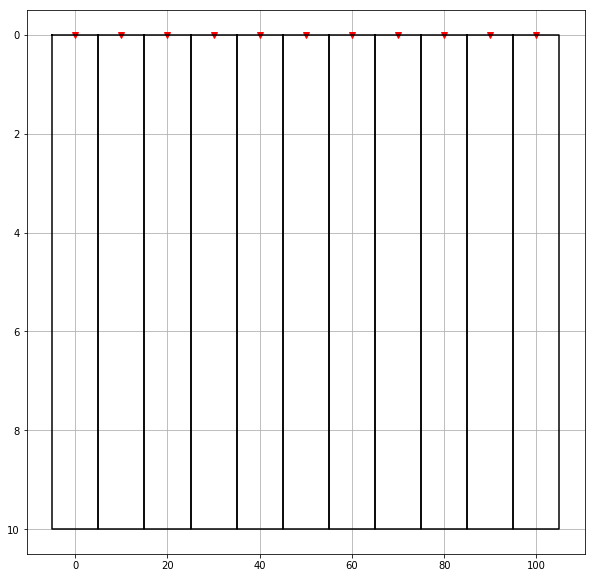

In [7]:
# Visualização gráfica:
plt.figure( figsize=(10,10) )
plt.plot(x,z,'vr')

for i in range (nobs):
    plt.plot((x[i] - x_prisma, x[i] + x_prisma, x[i] + x_prisma, x[i] - x_prisma, x[i] - x_prisma), 
             (zmin, zmin, zmax, zmax, zmin), 'black')

plt.grid()
plt.gca().invert_yaxis()
plt.show()

# os triângulos vermelhos consideram o relevo que pode ser a vir adicionado mais a frente dependendo do caso

# Tarefa:
> Testar a funcao plots_rectangles com o objetivo de representar um ambiente qualquer por retângulos: (OK)

In [8]:
# definicao das profundidades de cada prisma (a posteriori, sera o resultado obtido)
# é possível gerar valores para p de duas formas distintas com as 4 linhas abaixo
#p = np.linspace(2.0, 20.0, len(x), endpoint=True )
p = np.zeros( len(x) )
for i in range( len(x) ):
    p[i] = random.uniform(10.0, 20.0)

print( p )

[15.69991533 15.37285415 12.43066456 16.63586454 12.68492351 19.36249161
 17.05122666 12.77809542 11.49609343 10.3796627  15.19927734]


In [9]:
# definindo os valores de constraste de densidade
cden = np.zeros( len(x) )
for i in range( len(x) ):
    cden[i] = random.uniform(-0.7, 1.9) 
print( cden )

[ 0.09324201 -0.56738724 -0.1704954   0.60998528  0.86105688  0.12216901
  0.52306932 -0.51405398  0.55059667 -0.08281336  1.78462067]


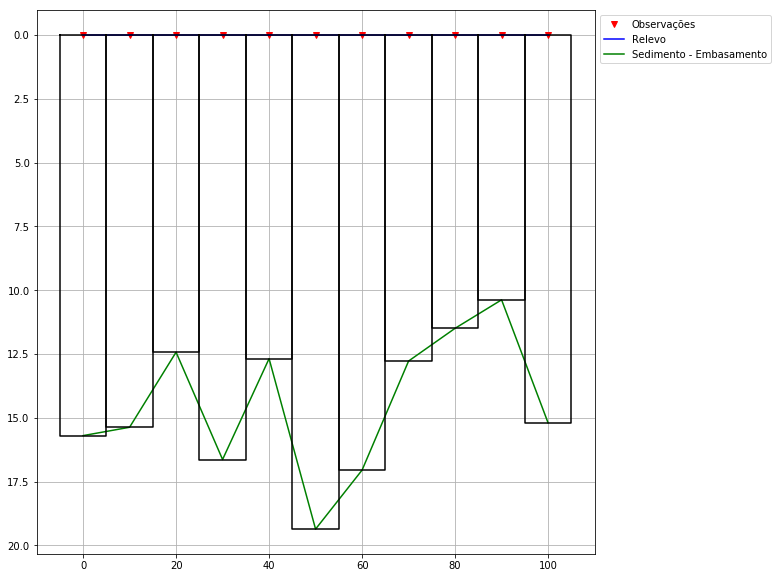

In [10]:
# teste da função plots_rectangles
x_coord, z_coord = plots_rectangles(x, z, p, color1='blue', color2='black', color3='green')

# Tarefas:
> (1) Ajustar o negocio ai (grafico) para observacoes que simulam um relevo (zo variavel) (OK, foi ajustado acima) <br> 
> (2) Preencher cada retangulo com cores, onde cada cor representa um contraste de densidade (OK) ($g/cm^3$)

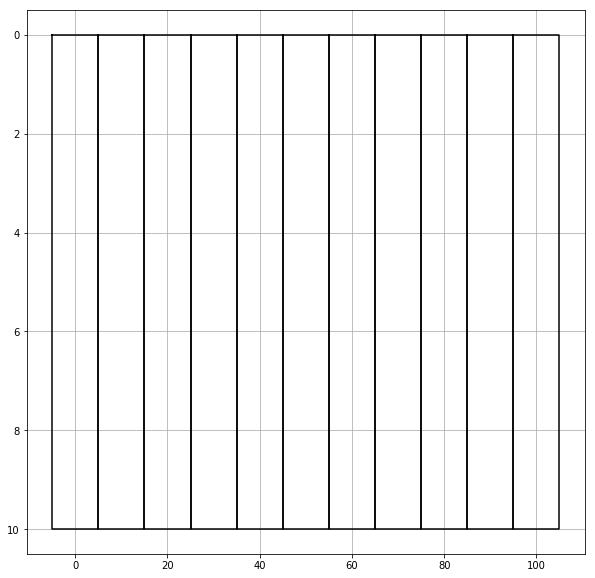

In [11]:
# inicio do desenvolvimento do raciocínio para preencher os retângulos com cores
# Visualização gráfica:
plt.figure( figsize=(10,10) )

for i in range(nobs):
    plt.plot((x[i] - x_prisma, x[i] + x_prisma, x[i] + x_prisma, x[i] - x_prisma, x[i] - x_prisma), 
             (zmin, zmin, zmax, zmax, zmin), 'black')

plt.grid()
plt.gca().invert_yaxis()
plt.show()

i = 0 => [ 0.89072011 13.05191144  9.37459105 23.69743879  2.33202496]
i = 1 => [ 2.48954751 19.62001469 26.59356658 20.1498832   7.18655577]
i = 2 => [13.64103136  3.6200876   7.2347578  14.94234453  7.12497263]
i = 3 => [ 1.84336047  2.0942747   0.98217981  7.15743049 24.92596146]
i = 4 => [24.82813047 13.15089128 29.13322518 20.00563395 12.1018019 ]
i = 5 => [24.20079947 20.54072579 11.3222136  16.98097944  3.32359561]
i = 6 => [28.20434226 24.95281664 23.05402485 13.96364374 13.14056118]
i = 7 => [11.21191618  0.95438338 16.50009765 22.29268338 25.46742963]
i = 8 => [ 2.0337738  13.45349027  2.73900431 15.93596459 17.25919262]
i = 9 => [ 0.75401222 26.64845086 10.95035533 20.10074049 14.34821389]
i = 10 => [15.93784063 20.33474103  5.0235619  11.23671001 18.03474296]


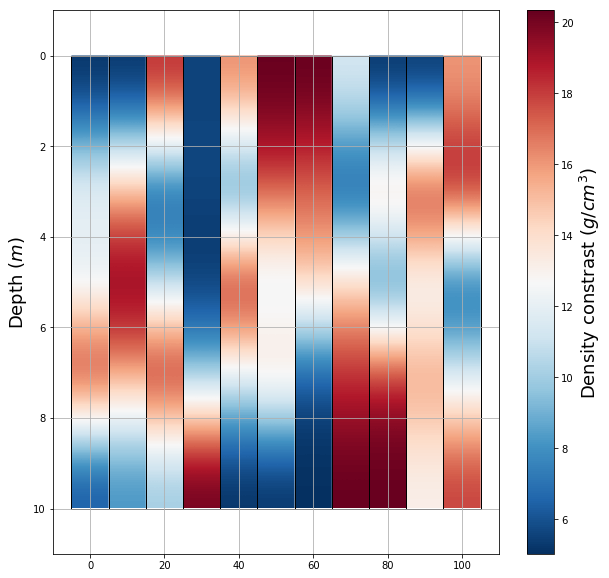

In [12]:
# Colorindo os primas de acordo com os valores de contraste de densidade usando plt.imshow
plt.figure( figsize=(10,10) )

beta = 3.7 # valor do coeficiente de decaimento para a fórmula do constraste de densidade
rho0 = 2.78 # valor do constraste de densidade da superfície para a fórmula do constraste de densidade

for i in range(nobs):    
    xp = np.array([x[i] - x_prisma, x[i] + x_prisma, x[i] + x_prisma, x[i] - x_prisma, x[i] - x_prisma])
    zp = np.array([zmin, zmin, zmax, zmax, zmin])
    
    cden = np.zeros( len(xp) )
    for j in range( len(xp) ): # construindo um vetor com valores de constraste de densidade aleatórios
        #zz = np.linspace( 0.0, p[i], len(xp), endpoint=True )
        #cden[j] = rho0 * beta**2/( beta + zz[j] )**2 # aplicação da fórmula do constraste da densidade 
        cden[j] = random.uniform(0.0, 30.0)
    print('i =',i,'=>',cden) # apenas sendo usado para confirmar mais facilmente a escala de cor até ela ser ajustada corretamente
    
    path = Path(np.array([xp,zp]).T)
    patch = PathPatch(path, facecolor='none')
    
    plt.gca().add_patch(patch)
    fs = 18 # font size for the label
    plt.ylabel('Depth $(m)$',fontsize=fs)
    
    im = plt.imshow(cden.reshape(np.size(zp),1), cmap='RdBu_r',interpolation="bicubic", 
                    vmin=min(cden), vmax=max(cden),
                    origin='lower',extent=[min(xp), max(xp), min(zp), max(zp)],
                    aspect="auto", clip_path=patch, clip_on=True)
    
    ############ INICIO DO TRECHO USADO APENAS PARA COLETAR DADOS DE REFERENCIA PARA O PROXIMO CODE ##############
    # os valores de mi e ma serão usados para definir os extremos da escala de cor do plt.imshow no próximo code
    # lista1 salvará todos os valores de contraste de densidade gerados para serem usados no próximo code
    if i == (nobs - 1):
        mi = min(cden)
        ma = max(cden) 
    if i == 0: 
        lista1 = [cden]
    else:    
        lista1.append(cden)
    ############## FIM DO TRECHO USADO APENAS PARA COLETAR DADOS DE REFERENCIA PARA O PROXIMO CODE ################
        
# se a colorbar for colocada dentro do for, será possível ver que é adotada uma escala de cor para cada prisma separado
# pelo comentário acima, foi visto uma necessidade de padronizar essa colorbar
cbar = plt.colorbar()
cbar.ax.set_ylabel('Density constrast $(g/cm^3)$', fontsize=fs)

plt.xlim( [ x[0] - 2 * x_prisma , x[nobs - 1] + 2 * x_prisma ] ) # retirar esse comando, interfere na visualização
plt.ylim( zmax + 1, zmin - 1 )

plt.grid()
plt.show()

i = 2 => [13.64103136  3.6200876   7.2347578  14.94234453  7.12497263]


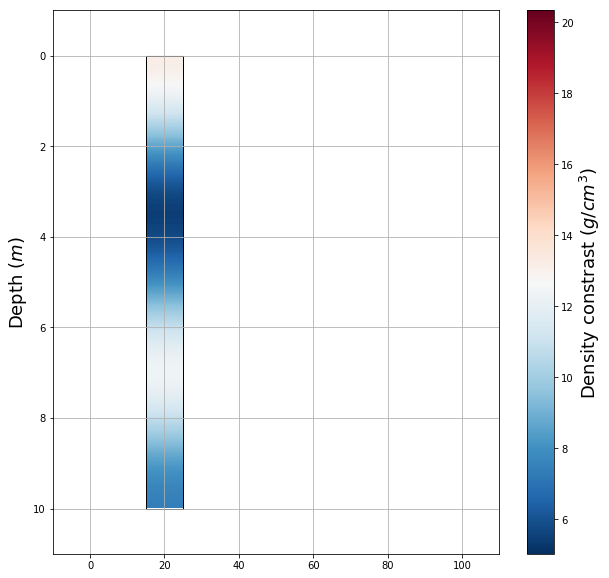

In [13]:
# Conferindo a colorbar para cada prisma (ATUALIZANDO)
# A função desse code é apenas validar o code anterior
# Se o code anterior for rodado, então esse deve ser também para as comparações serem feitas corretamente
plt.figure( figsize=(10,10) )

i = 2 # alterar isso para ajustar qual barra será comparada !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    
xp = np.array([x[i] - x_prisma, x[i] + x_prisma, x[i] + x_prisma, x[i] - x_prisma, x[i] - x_prisma])
zp = np.array([zmin, zmin, zmax, zmax, zmin])

cden = np.array(lista1[i]) 
print('i =',i,'=>',cden) # apenas sendo usado para confirmar mais facilmente a escala de cor

path = Path(np.array([xp,zp]).T)
patch = PathPatch(path, facecolor='none')
    
plt.gca().add_patch(patch)
fs = 18 # font size for the label
plt.ylabel('Depth $(m)$',fontsize=fs)
    
im = plt.imshow(cden.reshape(np.size(zp),1), cmap='RdBu_r',interpolation="bicubic", 
                    vmin=mi, vmax=ma,
                    origin='lower',extent=[min(xp), max(xp), min(zp), max(zp)],
                    aspect="auto", clip_path=patch, clip_on=True)

cbar = plt.colorbar()
cbar.ax.set_ylabel('Density constrast $(g/cm^3)$', fontsize=fs)

plt.xlim( [ x[0] - 2 * x_prisma , x[nobs - 1] + 2 * x_prisma ] ) 
plt.ylim( zmax + 1, zmin - 1 )

plt.grid()
plt.show()

i = 0 => [2.980650691725999, 24.72277147604422, 8.384435549183106, 19.62889985587074, 17.85040160382532]
i = 1 => [18.243309020811502, 23.86928651767333, 8.052978091453811, 13.09183368347631, 6.012261025720376]
i = 2 => [8.073075209330398, 29.649286945787434, 0.19779397503031038, 15.946529622115266, 0.09297201848636694]
i = 3 => [5.101410316490482, 23.24964448878925, 3.1037891515570526, 1.65032984156386, 11.2637714320557]
i = 4 => [23.60408835013114, 10.477978742554129, 28.55838531539602, 19.539022494608187, 5.474402030113376]
i = 5 => [22.97238607349574, 22.180981799086226, 27.948922206775936, 12.172155159442086, 9.539636879769404]
i = 6 => [27.09850466332907, 23.800217662528247, 1.493074352764464, 28.486839835721938, 0.4768620378245636]
i = 7 => [10.989327104291656, 3.936974848585865, 6.347396753246554, 0.6971787481654557, 12.277563496531517]
i = 8 => [5.193408078706074, 18.38073508555877, 13.29562515849022, 14.57192072610136, 6.8361117084657606]
i = 9 => [21.05885119974583, 5.494115

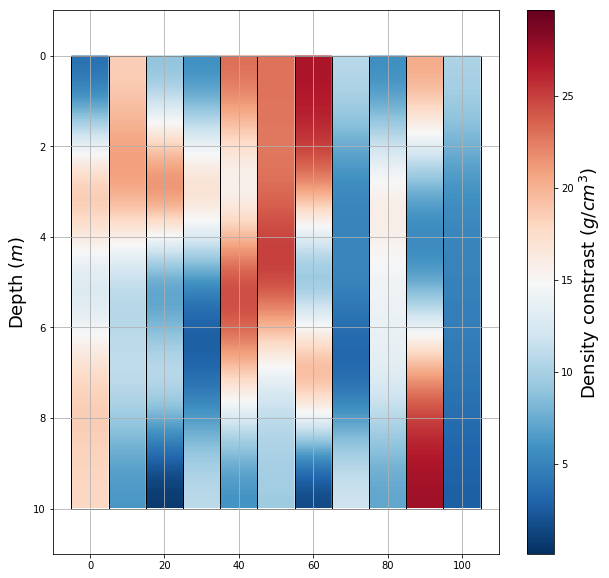

In [14]:
# Colorindo os primas de acordo com os valores de contraste de densidade usando plt.imshow (ATUALIZADO)
plt.figure( figsize=(10,10) )

cden = []
for i in range (nobs):
    # gerando valores aleatórios para contraste de densidade
    # salvando os valores máximos e mínimos de contraste de densidade para a escala de cor de plt.imshow
    for j in range( len(xp) ): 
        if j == 0:
            value = random.uniform(0.0, 30.0)
            cden.append( [value] )
        else:
            value = random.uniform(0.0, 30.0)
            cden[i].append( value )
        
        if j == 0 and i == 0: 
            cden_min = value
            cden_max = value
        else:
            if value > cden_max:
                cden_max = value
            if value < cden_min:
                cden_min = value
    print('i =',i,'=>',cden[i]) # apenas usado para confirmar mais facilmente a escala de cor até ela ser ajustada corretamente

for i in range (nobs):
    
    xp = np.array([x[i] - x_prisma, x[i] + x_prisma, x[i] + x_prisma, x[i] - x_prisma, x[i] - x_prisma])
    zp = np.array([zmin, zmin, zmax, zmax, zmin])
    
    path = Path(np.array([xp,zp]).T)
    patch = PathPatch(path, facecolor='none')
    
    plt.gca().add_patch(patch)
    fs = 18 # font size for the label
    plt.ylabel('Depth $(m)$',fontsize=fs)
    
    cden_part = np.array( cden[i] ) # Isolando apenas os dados do contraste de densidade que serão usados nesse for  
    
    im = plt.imshow(cden_part.reshape(np.size(zp),1), cmap='RdBu_r',interpolation="bicubic", 
                    vmin=cden_min, vmax=cden_max,
                    origin='lower',extent=[min(xp), max(xp), min(zp), max(zp)],
                    aspect="auto", clip_path=patch, clip_on=True)
    
    ############ INICIO DO TRECHO USADO APENAS PARA COLETAR DADOS DE REFERENCIA PARA O PROXIMO CODE ##############
    # os valores de mi2 e ma2 serão usados para definir os extremos da escala de cor do plt.imshow no próximo code
    if i == (nobs - 1):
        for j in range ( len(xp) ):
            if j == 0:
                mi2 = cden[i][j]
                ma2 = cden[i][j]
            else:
                if cden[i][j] > ma2:
                    ma2 = cden[i][j]
                if cden[i][j] < mi2:
                    mi2 = cden[i][j]
    ############## FIM DO TRECHO USADO APENAS PARA COLETAR DADOS DE REFERENCIA PARA O PROXIMO CODE ################
        
cbar = plt.colorbar()
cbar.ax.set_ylabel('Density constrast $(g/cm^3)$', fontsize=fs)

plt.xlim([x[0] - 2 * x_prisma , x[nobs - 1] + 2 * x_prisma]) # retirar esse comando, interfere na visualização
plt.ylim( zmax + 1, zmin - 1 )

plt.grid()
plt.show()

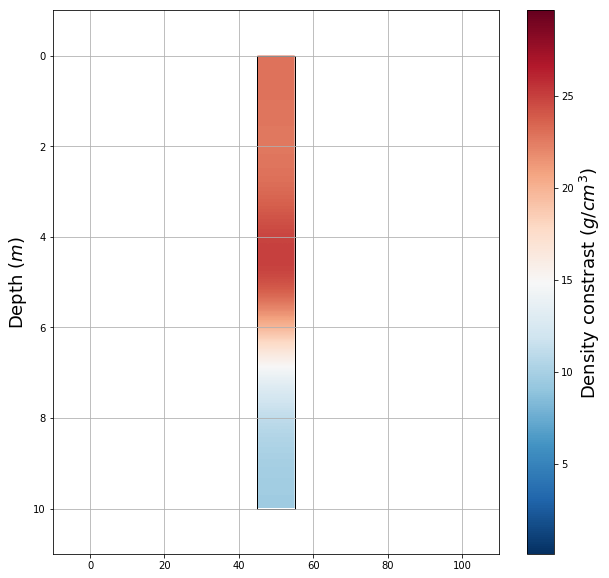

In [15]:
# Conferindo a colorbar para cada prisma (ATUALIZADO)
# A função desse code é apenas validar o code anterior
# Se o code anterior for rodado, então esse deve ser também para as comparações serem feitas corretamente
plt.figure( figsize=(10,10) )

i = 5 # alterar isso para ajustar qual barra será comparada !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    
xp = np.array([x[i] - x_prisma, x[i] + x_prisma, x[i] + x_prisma, x[i] - x_prisma, x[i] - x_prisma])
zp = np.array([zmin, zmin, zmax, zmax, zmin])

path = Path(np.array([xp,zp]).T)
patch = PathPatch(path, facecolor='none')
    
plt.gca().add_patch(patch)
fs = 18 # font size for the label
plt.ylabel('Depth $(m)$',fontsize=fs)

cden_part = np.array( cden[i] )
im = plt.imshow(cden_part.reshape(np.size(zp),1), cmap='RdBu_r',interpolation="bicubic", 
                    vmin=cden_min, vmax=cden_max,
                    origin='lower',extent=[min(xp), max(xp), min(zp), max(zp)],
                    aspect="auto", clip_path=patch, clip_on=True)

cbar = plt.colorbar()
cbar.ax.set_ylabel('Density constrast $(g/cm^3)$', fontsize=fs)

plt.xlim([x[0] - 2 * x_prisma , x[nobs - 1] + 2 * x_prisma])
plt.ylim( zmax + 1, zmin - 1 )

plt.grid()
plt.show()

i = 0 => [6.363831182499537, 5.393306827235824, 14.727351589462717, 9.178922120955239, 15.064157170345718]
i = 1 => [17.515940518884648, 4.883974268308577, 21.90302894891294, 10.451057493050858, 3.412037297123387]
i = 2 => [13.737437406745487, 22.249879142912395, 2.233548961851737, 11.604891312951434, 11.79869787040967]
i = 3 => [8.911374357464052, 28.622884036167676, 13.747546462447279, 19.37798342143975, 12.041893252174834]
i = 4 => [25.329743682454467, 17.45053230590806, 23.318137136697516, 0.6496099619465601, 29.53492146310936]
i = 5 => [27.11484559424492, 21.208940877146162, 17.905588726104483, 24.20904588030161, 4.900870738047319]
i = 6 => [28.129146524390983, 10.666021494948538, 25.530491830765403, 7.178449139203991, 18.19357166269891]
i = 7 => [5.861108601854276, 13.512011211124562, 24.880497714979303, 6.0810319734146585, 18.646476732086747]
i = 8 => [2.6717328920559726, 22.01001395700587, 14.296316028041677, 7.1855601115842616, 25.287827964941158]
i = 9 => [14.132017872230755,

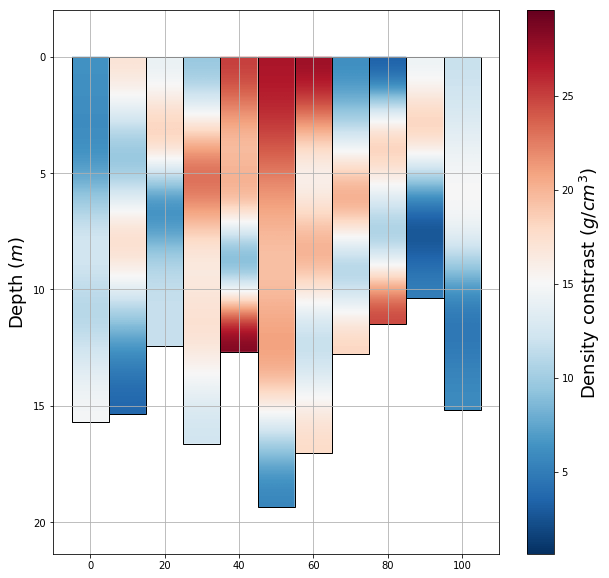

In [16]:
# Aplicando o relevo aos prismas já coloridos devidamente com o plt.imshow
plt.figure( figsize=(10,10) )

cden = []
for i in range (nobs): 
    # gerando valores aleatórios para contraste de densidade
    # salvando os valores máximos e mínimos de contraste de densidade para a escala de cor de plt.imshow
    for j in range( 5 ):
        if j == 0:
            value = random.uniform(0.0, 30.0)
            cden.append( [value] )
        else:
            value = random.uniform(0.0, 30.0)
            cden[i].append( value )
        
        if j == 0 and i == 0:
            cden_min = value
            cden_max = value
        else:
            if value > cden_max:
                cden_max = value
            if value < cden_min:
                cden_min = value
    print('i =',i,'=>',cden[i]) # apenas usado para confirmar mais facilmente a escala de cor até ela ser ajustada corretamente
     
for i in range (nobs): # pintando as áreas dos retângulos     
    zp = np.array([ z[i], z[i], z[i] + p[i] , z[i] + p[i], z[i] ])
    # salvando os valores máximos e mínimos de profundidade para definir melhor o intervalo do eixo y
    if i == 0:
        zmin2 = z[i] 
        zmax2 = z[i] + p[i]
    else:
        if z[i] + p[i]  > zmax2:
            zmax2 = z[i] + p[i]
        if z[i]  < zmin2:
            zmin2 = z[i] 
    
    xp = np.array([x[i] - x_prisma, x[i] + x_prisma, x[i] + x_prisma, x[i] - x_prisma, x[i] - x_prisma])
    
    path = Path(np.array([xp,zp]).T)
    patch = PathPatch(path, facecolor='none')
    
    plt.gca().add_patch(patch)
    fs = 18 # font size for the label
    plt.ylabel('Depth $(m)$',fontsize=fs)
    
    cden_part = np.array( cden[i] ) # Isolando apenas os dados do contraste de densidade que serão usados nesse for  
    
    im = plt.imshow(cden_part.reshape(np.size(zp),1), cmap='RdBu_r',interpolation="bicubic", 
                    vmin=cden_min, vmax=cden_max,
                    origin='lower',extent=[min(xp), max(xp), min(zp), max(zp)],
                    aspect="auto", clip_path=patch, clip_on=True)

cbar = plt.colorbar()
cbar.ax.set_ylabel('Density constrast $(g/cm^3)$', fontsize=fs)

plt.xlim( [ x[0] - 2 * x_prisma , x[nobs - 1] + 2 * x_prisma ] ) # retirar esse comando, interfere na visualização
plt.ylim(zmax2 + 2, zmin2 - 2)

plt.grid()
plt.show()

# Tarefa:
> Testar a função plots_paint_rectangles para plotar retângulos pintados de forma que representem o ambiente com uma certa fidelidade e que sejam pintados de acordo com alguma propriedade ou grandeza física das subperfícies que esteja em estudo. Essa função será testada em dois casos que são descritos abaixo. <br>
>> (1) Considerar essa propriedade ou grandeza física constante para cada retângulo (OK) <br>
>> (2) Considerar essa propriedade ou grandeza física variando para cada retângulo (OK)

## TODO:
> (1) Generalizar o numero de pontos (elementos de var) dentro de cada prisma para plotagem (refinar as cores) (OK)<br>
> (2) A pessoa estipula a nivel de referencia que deseja utilizar para a posicao do topo de cada prismas. (Essa é uma questão que foi deixada de lado, pois não era o foco do momento)

i = 0 => [14.17983066684733, 26.26839123220919, 27.5761947808275, 19.184999140840556, 19.281865178720924]
i = 1 => [22.85630333677603, 28.60666648981813, 21.046507965389683, 1.4534650122365, 22.08525252643784]
i = 2 => [29.125118600145054, 10.813810772665713, 8.341436814487173, 3.121757558547319, 9.408814670227871]
i = 3 => [20.28160904394084, 6.993719318531342, 21.277305449621544, 8.248113334921172, 25.05939237967459]
i = 4 => [10.529299989962484, 21.139497408429435, 11.851976545807572, 11.437242728832942, 21.736163366865075]
i = 5 => [13.704223878714137, 6.454099234129679, 10.492162245128352, 24.38061419216288, 15.151348805340568]
i = 6 => [17.188816758486016, 27.704484758560824, 22.017713381123507, 20.248131554256307, 13.911868356719893]
i = 7 => [6.515902294063044, 26.513438086166133, 0.48724033356237095, 5.039726261331622, 10.461351438632192]
i = 8 => [15.850832671236628, 11.080120177299344, 27.50859209401685, 16.186583794329508, 9.15017654758486]
i = 9 => [21.64131744143597, 23.3

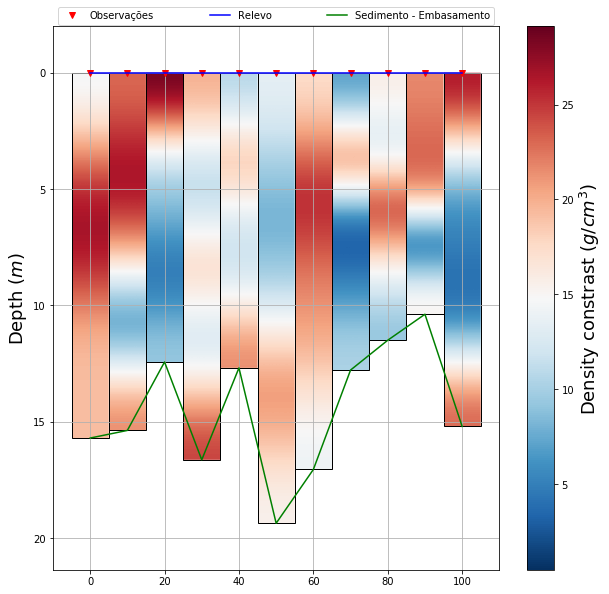

In [17]:
# Caso em que a propriedade ou grandeza física varia ou é constante para cada retângulo:
cden = []
n = 5
for i in range (nobs):
    for j in range( n ):
        if j == 0:
            value = random.uniform(0.0, 30.0)
            cden.append( [value] )
        else:
            value = random.uniform(0.0, 30.0)
            cden[i].append( value )
            
plots_paint_rectangles(x, z, p, n_var=n, var=cden, name='Density constrast $(g/cm^3)$', cmap='RdBu_r',
                       color1='blue', color2='green')

In [ ]:
### USO DO ENUMERATE PARA EVENTUAIS LOOPS MULTIPLOS
A = np. ones( (2,5) )
A[0,:] = 5.0

In [ ]:
for i,j in enumerate(A):
    print(i)